In [27]:
import numpy as np

In [28]:
from pycbc.waveform import td_approximants, fd_approximants, get_td_waveform, get_fd_waveform
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [29]:
print(td_approximants())

['TaylorT1', 'TaylorT2', 'TaylorT3', 'SpinTaylorT1', 'SpinTaylorT4', 'SpinTaylorT5', 'PhenSpinTaylor', 'PhenSpinTaylorRD', 'EOBNRv2', 'EOBNRv2HM', 'TEOBResum_ROM', 'SEOBNRv1', 'SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv3', 'SEOBNRv3_pert', 'SEOBNRv3_opt', 'SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P', 'SEOBNRv4PHM', 'SEOBNRv2T', 'SEOBNRv4T', 'SEOBNRv4_ROM_NRTidalv2', 'SEOBNRv4_ROM_NRTidalv2_NSBH', 'HGimri', 'IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomD_NRTidalv2', 'IMRPhenomNSBH', 'IMRPhenomHM', 'IMRPhenomPv2', 'IMRPhenomPv2_NRTidal', 'IMRPhenomPv2_NRTidalv2', 'TaylorEt', 'TaylorT4', 'EccentricTD', 'SpinDominatedWf', 'NR_hdf5', 'NRSur7dq2', 'NRSur7dq4', 'SEOBNRv4HM', 'NRHybSur3dq8', 'IMRPhenomXAS', 'IMRPhenomXHM', 'IMRPhenomPv3', 'IMRPhenomPv3HM', 'IMRPhenomXP', 'IMRPhenomXPHM', 'TEOBResumS', 'IMRPhenomT', 'IMRPhenomTHM', 'IMRPhenomTP', 'IMRPhenomTPHM', 'SEOBNRv4HM_PA', 'pSEOBNRv4HM_PA', 'IMRPhenomXAS_NRTidalv2', 'IMRPhenomXP_NRTidalv2', 'IMRPhenomXO4a', 'E

In [30]:
print(fd_approximants())

['EccentricFD', 'TaylorF2', 'TaylorF2Ecc', 'TaylorF2NLTides', 'TaylorF2RedSpin', 'TaylorF2RedSpinTidal', 'SpinTaylorF2', 'EOBNRv2_ROM', 'EOBNRv2HM_ROM', 'SEOBNRv1_ROM_EffectiveSpin', 'SEOBNRv1_ROM_DoubleSpin', 'SEOBNRv2_ROM_EffectiveSpin', 'SEOBNRv2_ROM_DoubleSpin', 'SEOBNRv2_ROM_DoubleSpin_HI', 'Lackey_Tidal_2013_SEOBNRv2_ROM', 'SEOBNRv4_ROM', 'SEOBNRv4HM_ROM', 'SEOBNRv4_ROM_NRTidal', 'SEOBNRv4_ROM_NRTidalv2', 'SEOBNRv4_ROM_NRTidalv2_NSBH', 'SEOBNRv4T_surrogate', 'IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomD_NRTidal', 'IMRPhenomD_NRTidalv2', 'IMRPhenomNSBH', 'IMRPhenomHM', 'IMRPhenomP', 'IMRPhenomPv2', 'IMRPhenomPv2_NRTidal', 'IMRPhenomPv2_NRTidalv2', 'SpinTaylorT4Fourier', 'SpinTaylorT5Fourier', 'NRSur4d2s', 'IMRPhenomXAS', 'IMRPhenomXHM', 'IMRPhenomPv3', 'IMRPhenomPv3HM', 'IMRPhenomXP', 'IMRPhenomXPHM', 'SEOBNRv5_ROM', 'IMRPhenomXAS_NRTidalv2', 'IMRPhenomXP_NRTidalv2', 'IMRPhenomXO4a', 'ExternalPython', 'SpinTaylorF2_SWAPPER', 'TaylorF2NL', 'PreTaylorF2', 'mult

# Time domain

In [32]:
hp, hc = get_td_waveform(approximant='SEOBNRv5E',
                                 mass1=30,
                                 mass2=30,
                                 spin1z=0.1,
                                 delta_t=1.0/4096,
                                 f_lower=20,
                                 eccentricity=0.2,rel_anomaly=0)

In [33]:
hp.start_time

LIGOTimeGPS(-2, -283691406)

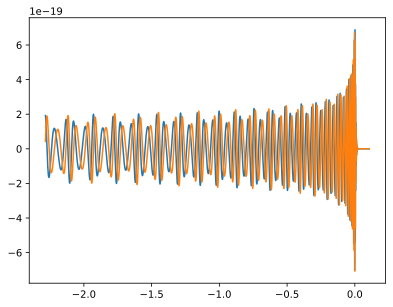

In [34]:
plt.plot(hp.sample_times,hp)
plt.plot(hc.sample_times,hc)

# Frequency domain

In [46]:
hpf, hcf = get_fd_waveform(approximant='SEOBNRv5E',
                                 mass1=30,
                                 mass2=30,
                                 spin1z=0.1,
                                 f_lower=20,
                                 delta_f = 1/32,
                                 eccentricity=0.2,rel_anomaly=0)

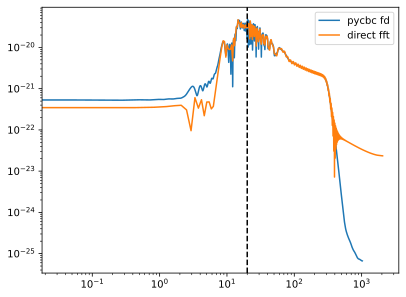

In [47]:
plt.loglog(hpf.sample_frequencies,abs(hpf),label='pycbc fd')
hp_tdtofd = hp.to_frequencyseries()
plt.loglog(hp_tdtofd.sample_frequencies,abs(hp_tdtofd),label='direct fft')
plt.axvline(20,ls='--',color='black')
plt.legend()

In [48]:
hpf.start_time

LIGOTimeGPS(0, 0)

In [49]:
hp_fdtotd = hpf.to_timeseries()

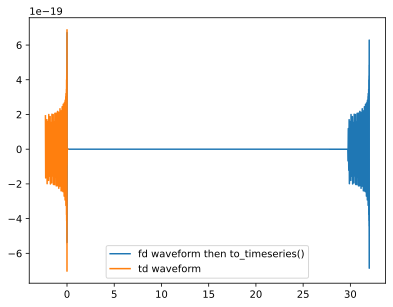

In [50]:
plt.plot(hp_fdtotd.sample_times,hp_fdtotd,label='fd waveform then to_timeseries()')
plt.plot(hp.sample_times,hp,label='td waveform')
plt.legend()

(29.0, 33.5994873046875)

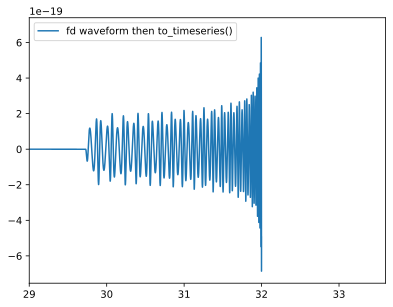

In [53]:
plt.plot(hp_fdtotd.sample_times,hp_fdtotd,label='fd waveform then to_timeseries()')
plt.legend()
plt.xlim(29,)

# SEOBNRv5_ROM

In [42]:
hpf, hcf = get_fd_waveform(approximant='SEOBNRv5_ROM',
                                 mass1=30,
                                 mass2=30,
                                 spin1z=0.1,
                                 f_lower=20,
                                 delta_f = 1/32)

In [43]:
hpf.start_time

LIGOTimeGPS(-32, 0)

In [44]:
hp_t = hpf.to_timeseries()

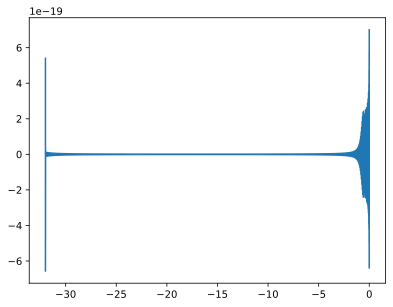

In [45]:
plt.plot(hp_t.sample_times,hp_t)

# checking: SEOBNRv5 Time domain again

In [5]:
from pycbc.waveform import utils as wfutils

In [6]:
hp, _ = get_td_waveform(approximant='SEOBNRv5E',
                                 mass1=30,
                                 mass2=30,
                                 spin1z=0.1,
                                 f_lower=20,
                                 delta_t = 1/2048,
                                 eccentricity=0.2,rel_anomaly=0)

In [7]:
hp.duration

2.392578125

In [8]:
hp.start_time

LIGOTimeGPS(-2, -283691406)

In [9]:
tsamples = int(1.0 / (1/16) / (1/2048) )

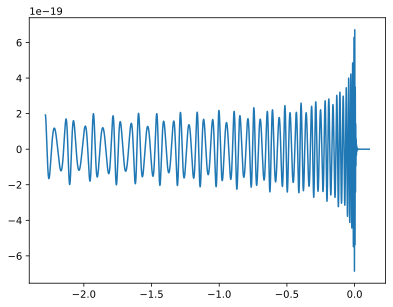

In [10]:
plt.plot(hp.sample_times,hp)

# Resize

In [11]:
hp.resize(tsamples)

In [12]:
hp.start_time

LIGOTimeGPS(-2, -283691406)

In [13]:
hp.duration

16.0

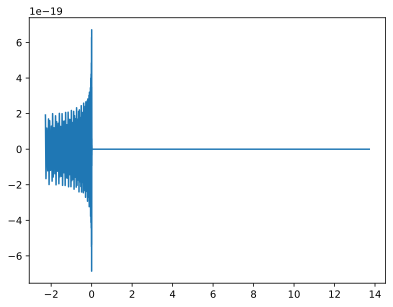

In [14]:
plt.plot(hp.sample_times,hp)

# Taper

In [15]:
hp = wfutils.td_taper(hp, hp.start_time, hp.start_time + 0.5)

In [16]:
hp.start_time

LIGOTimeGPS(-2, -283691406)

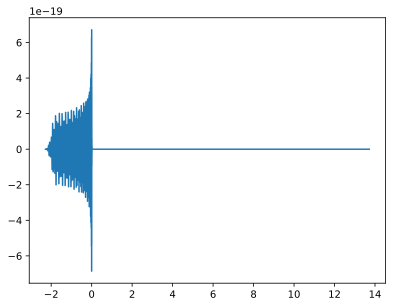

In [17]:
plt.plot(hp.sample_times,hp)

In [18]:
hp_f = hp.to_frequencyseries()

In [19]:
hp_f.start_time

LIGOTimeGPS(-2, -283691406)

In [20]:
hp_cyc1 = hp_f.cyclic_time_shift(1)

In [22]:
hp_cyc1.start_time

LIGOTimeGPS(-3, -283691406)

In [23]:
hp_cyc1_td = hp_cyc1.to_timeseries()

In [24]:
hp_cyc1_td.start_time

LIGOTimeGPS(-3, -283691406)

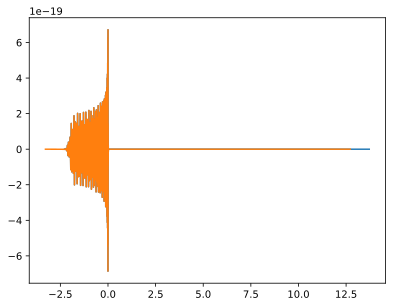

In [26]:
plt.plot(hp.sample_times,hp)
plt.plot(hp_cyc1_td.sample_times,hp_cyc1_td)

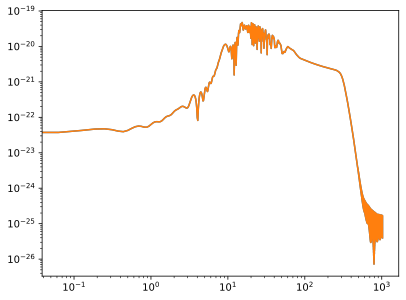

In [102]:
plt.loglog(hp.sample_frequencies,abs(hp))
plt.loglog(hp_cyc.sample_frequencies,abs(hp_cyc))

/work/yifanwang/ecc/env/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/work/yifanwang/ecc/env/lib/python3.9/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


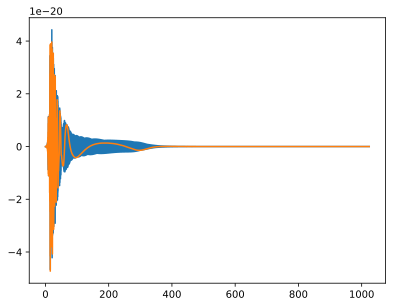

In [104]:
plt.plot(hp.sample_frequencies,hp)
plt.plot(hp_cyc.sample_frequencies,hp_cyc)

In [106]:
hp_t = hp.to_timeseries()
hp_cyc_t = hp_cyc.to_timeseries()

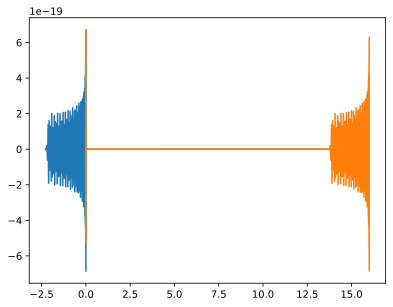

In [107]:
plt.plot(hp_t.sample_times,hp_t)
plt.plot(hp_cyc_t.sample_times,hp_cyc_t)

In [49]:
hp.start_time

LIGOTimeGPS(0, 0)

In [50]:
hp_t = hp.to_timeseries()

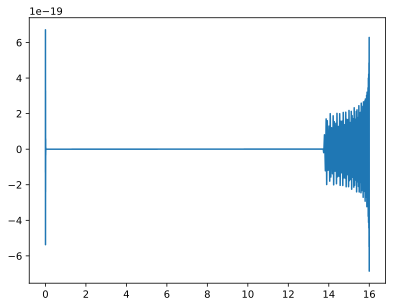

In [51]:
plt.plot(hp_t.sample_times,hp_t)